In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc,roc_auc_score

from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.pipeline
import sklearn.preprocessing

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 296kB 14.3MB/s 
     |████████████████████████████████| 163kB 44.4MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 112kB 47.8MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 143kB 47.2MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import optuna

In [ ]:
#Reading the data
data = pd.read_csv('arrhythmia.data',header = None)

In [ ]:
# For this data set, the missing values are filled with ?. In this step '?' is replaced with np.Nan
data.replace('?',np.NaN,inplace=True)

In [ ]:

#Exploring the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
 #Splitting the data into predictors and outcome.
 X = data[data.columns[0:279]]
 y = data[data.columns[-1]]

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.7,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,-0.5,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [ ]:
print(y.value_counts())
print(len(y))

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: 279, dtype: int64
452


<Figure size 1280x640 with 0 Axes>

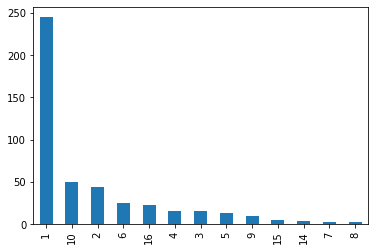

<Figure size 1280x640 with 0 Axes>

In [ ]:
#Plotting the distribution of target variables.
data[279].value_counts().plot(kind = 'bar')
figure(figsize=(16, 8), dpi=80)

####From the graph we can observe that the data is not properly balaced. One can consider the techniques like oversampling the minority label or undersampling the majority label. Since the data is imbalanced, we have to perform stratified.

*italicized text*### Approach 2: Reduce the number of classses.
##### 

In [ ]:
y_multi = []
for i in y:
  if i==1:
    y_multi.append(0)
  elif i == 2 :
    y_multi.append(1)
  elif i == 3 or i == 4:
    y_multi.append(2)
  elif i == 5 or i == 6:
    y_multi.append(3)
  elif i == 7 or i == 8:
    y_multi.append(4)
  elif  i == 9 or i == 10:
    y_multi.append(5)
  elif  i == 14 or i == 15 or i==16:
     y_multi.append(6)

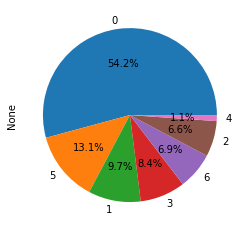

In [ ]:
y_multi = pd.Series(y_multi)
y_multi.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [ ]:
y_multi.value_counts()

0    245
5     59
1     44
3     38
6     31
2     30
4      5
dtype: int64

Exploratory Data Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.20, random_state=42 )

In [ ]:
col_missing_values = [10,11,12,13,14]

for i in col_missing_values:
    X_train[i] = X_train[i].astype(float)
    X_test[i] = X_test[i].astype(float)

train_mean={}
for i in col_missing_values :
    train_mean[i] = X_train[i].mean() 

for i in col_missing_values:
  X_train[i].replace(np.nan,train_mean[i],inplace= True)
  X_test[i].replace(np.nan,train_mean[i],inplace= True)

nominal_cols = []
nominal_cols.append(1)
wave_cols = [15,27,39,51,63,75,87,99,111,123,135,147]
for x in wave_cols:
  sub_col = [i for i in range(x+6,x+12)]
  nominal_cols.extend(sub_col)

for i in nominal_cols:
  X_train[i] = X_train[i].astype(str).astype(int)
  X_test[i] = X_test[i].astype(str).astype(int)


clf = StandardScaler()
clf.fit(X_train)
X_train = pd.DataFrame(clf.transform(X_train))
X_test = pd.DataFrame(clf.transform(X_test))

Inspect the independent variables

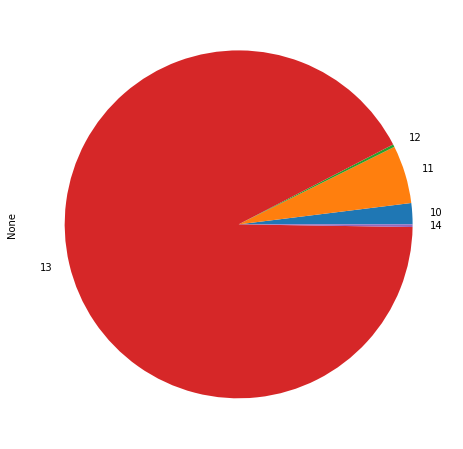

In [ ]:
#Checking for missing values.
X.isna().sum().plot(kind = 'pie',figsize=(16, 8))

Columns 10,11,12,13, and 14 have missing values. One should inspect the type of the variabl replace with either mean or mode accordingly.


The columns 10,11,12,13,and 14 are:
 Vector angles in degrees on front plane of:, linear <br>
     10 QRS <br>
     11 T <br>
     12 P <br>
     13 QRST <br>
     14 J <br>

     Since they are linear, they can be replaced by mean.

In [ ]:
def objective(trial):
    
    
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForestClassifier", "ElasticNet","LogReg"])
    
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        model = sklearn.svm.SVC(C=svc_c, gamma="auto")
        
    elif classifier_name == "RandomForestClassifier":
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32)
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 2, 128, log=True)
        model = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    elif classifier_name == "ElasticNet":
        en_l1_ratio = trial.suggest_float("en_l1_ratio", 0, 1, log=False)
        model = sklearn.linear_model.ElasticNet(l1_ratio=en_l1_ratio)

    elif classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        model = sklearn.linear_model.LogisticRegression(C=logreg_c)
        
    score = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=3)
    accuracy = score.mean()
    
    return accuracy

In [ ]:
cstudy = optuna.create_study(direction="maximize")
cstudy.optimize(objective, n_trials=30)

[I 2021-04-27 19:48:06,222] A new study created in memory with name: no-name-9915f033-b13c-4d1c-98c4-8a895e93f4f7
[I 2021-04-27 19:48:07,093] Trial 0 finished with value: 0.7008264462809916 and parameters: {'classifier': 'RandomForestClassifier', 'rf_max_depth': 31, 'rf_n_estimators': 120}. Best is trial 0 with value: 0.7008264462809916.
[I 2021-04-27 19:48:07,129] Trial 1 finished with value: 0.5651974288337924 and parameters: {'classifier': 'RandomForestClassifier', 'rf_max_depth': 25, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.7008264462809916.
[I 2021-04-27 19:48:07,159] Trial 2 finished with value: 0.5956382001836548 and parameters: {'classifier': 'RandomForestClassifier', 'rf_max_depth': 3, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.7008264462809916.
[I 2021-04-27 19:48:07,189] Trial 3 finished with value: 0.5622819100091827 and parameters: {'classifier': 'RandomForestClassifier', 'rf_max_depth': 3, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.70082644

In [ ]:
cstudy.best_trial

FrozenTrial(number=25, values=[0.714692378328742], datetime_start=datetime.datetime(2021, 4, 27, 19, 48, 12, 557121), datetime_complete=datetime.datetime(2021, 4, 27, 19, 48, 13, 512229), params={'classifier': 'RandomForestClassifier', 'rf_max_depth': 21, 'rf_n_estimators': 127}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForestClassifier', 'ElasticNet', 'LogReg')), 'rf_max_depth': IntUniformDistribution(high=32, low=2, step=1), 'rf_n_estimators': IntLogUniformDistribution(high=128, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=25, state=TrialState.COMPLETE, value=None)

In [ ]:
cstudy.best_params

{'classifier': 'RandomForestClassifier',
 'rf_max_depth': 21,
 'rf_n_estimators': 127}

In [ ]:
model = sklearn.ensemble.RandomForestClassifier(
            max_depth= 32, n_estimators= 110
        )
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test= model.predict(X_test)
print(f1_score(y_test, prediction_test,average='micro') * 100)

70.32967032967034


# Multi Layer Perceptron

In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y_multi, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

In [ ]:
col_missing_values = [10,11,12,13,14]

for i in col_missing_values:
    X_train[i] = X_train[i].astype(float)
    X_val[i] = X_val[i].astype(float)
    X_test[i] = X_test[i].astype(float)

train_mean={}
for i in col_missing_values :
    train_mean[i] = X_train[i].mean() 

for i in col_missing_values:
  X_train[i].replace(np.nan,train_mean[i],inplace= True)
  X_val[i].replace(np.nan,train_mean[i],inplace= True)
  X_test[i].replace(np.nan,train_mean[i],inplace= True)

nominal_cols = []
nominal_cols.append(1)
wave_cols = [15,27,39,51,63,75,87,99,111,123,135,147]
for x in wave_cols:
  sub_col = [i for i in range(x+6,x+12)]
  nominal_cols.extend(sub_col)

for i in nominal_cols:
  X_train[i] = X_train[i].astype(str).astype(int)
  X_val[i] = X_val[i].astype(str).astype(int)
  X_test[i] = X_test[i].astype(str).astype(int)


clf = StandardScaler()
clf.fit(X_train)
X_train = pd.DataFrame(clf.transform(X_train))
X_val = pd.DataFrame(clf.transform(X_val))
X_test = pd.DataFrame(clf.transform(X_test))

In [ ]:
keras.backend.clear_session()
np.random.seed(425)
tf.random.set_seed(425)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[279]),
    # keras.layers.Dense(100, activation="relu"),
    # keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation="softmax")
])

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])

In [ ]:
y_train_en = to_categorical(y_train, 7)
y_test_en = to_categorical(y_test, 7)
y_val_en = to_categorical(y_val, 7)

In [ ]:
history = model.fit(X_train, y_train_en, epochs=20,
                    validation_data=(X_val, y_val_en))

Epoch 1/20
9/9 [==============================] - 1s 27ms/step - loss: 2.6506 - accuracy: 0.1358 - val_loss: 2.3464 - val_accuracy: 0.1538
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 2.4678 - accuracy: 0.1725 - val_loss: 2.1823 - val_accuracy: 0.2527
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 2.1914 - accuracy: 0.2290 - val_loss: 2.0616 - val_accuracy: 0.3077
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 1.9871 - accuracy: 0.3054 - val_loss: 1.9460 - val_accuracy: 0.3626
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 1.8636 - accuracy: 0.3569 - val_loss: 1.8396 - val_accuracy: 0.4176
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 1.6479 - accuracy: 0.4455 - val_loss: 1.7391 - val_accuracy: 0.4505
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 1.5854 - accuracy: 0.4306 - val_loss: 1.6573 - val_accuracy: 0.4945
Epoch 8/20
9/9 [=================

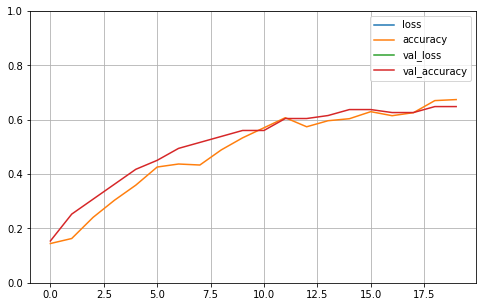

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The graph has accuracy and loss of resampled training set and vaidation set. There is a huge difference in the loss and validation loss. They are not nearly the same. Training loss is less than the validation loss, so model has is overfit.

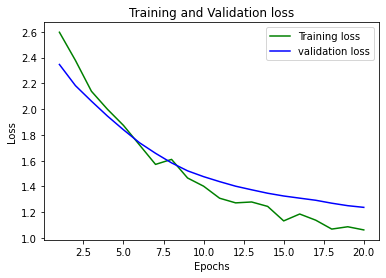

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

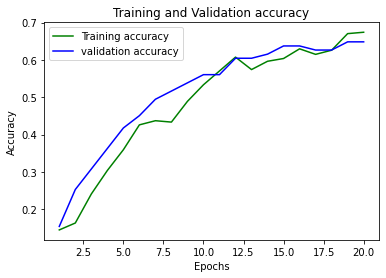

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict_classes(X_test)
acc_score = f1_score(y_test, predictions,average='micro')
print(acc_score*100)

62.637362637362635


COnvolution 1D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)


In [ ]:
model3 = Sequential()
model3.add(Conv1D(256, 3, activation='relu',input_shape=(279,1),padding='same'))
model3.add(MaxPooling1D())
model3.add(Dropout(0.5))
model3.add(Conv1D(128, 3, activation='relu',input_shape=(279,1),padding='same'))
model3.add(MaxPooling1D())
model3.add(Dropout(0.25))
model3.add(Conv1D(64, 3, activation='relu',input_shape=(279,1),padding='same'))
model3.add(MaxPooling1D())
model3.add(Dropout(0.5))
model3.add(Flatten()) 
model3.add(Dense(64, activation='relu')) 
model3.add(Dropout(0.5))               
model3.add(Dense(7, activation='softmax'))

model3.compile(loss = keras.losses.categorical_crossentropy, 
     optimizer = "adam",               
              metrics = ['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 279, 256)          1024      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 139, 256)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 139, 256)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 139, 128)          98432     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 69, 128)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 69, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 69, 64)           

In [ ]:
model3.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 279, 256)          1024      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 139, 256)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 139, 256)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 139, 128)          98432     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 69, 128)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 69, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 69, 64)           

In [ ]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
history = model3.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
9/9 [==============================] - 2s 165ms/step - loss: 1.8689 - accuracy: 0.3858 - val_loss: 1.6178 - val_accuracy: 0.5714
Epoch 2/20
9/9 [==============================] - 1s 131ms/step - loss: 1.6801 - accuracy: 0.5516 - val_loss: 1.5337 - val_accuracy: 0.5714
Epoch 3/20
9/9 [==============================] - 1s 131ms/step - loss: 1.5182 - accuracy: 0.5802 - val_loss: 1.4675 - val_accuracy: 0.5714
Epoch 4/20
9/9 [==============================] - 1s 131ms/step - loss: 1.4726 - accuracy: 0.5480 - val_loss: 1.3117 - val_accuracy: 0.5934
Epoch 5/20
9/9 [==============================] - 1s 132ms/step - loss: 1.2874 - accuracy: 0.5891 - val_loss: 1.3081 - val_accuracy: 0.6484
Epoch 6/20
9/9 [==============================] - 1s 129ms/step - loss: 1.2770 - accuracy: 0.5907 - val_loss: 1.2250 - val_accuracy: 0.6484
Epoch 7/20
9/9 [==============================] - 1s 128ms/step - loss: 1.2054 - accuracy: 0.5904 - val_loss: 1.2244 - val_accuracy: 0.6374
Epoch 8/20
9/9 [====

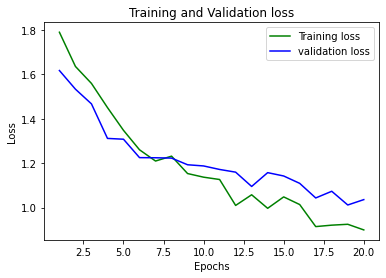

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

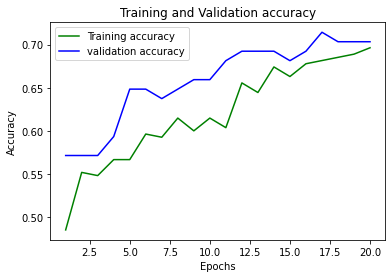

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred = model3.predict_classes(X_test)

In [ ]:
print(pred)

[0 2 5 0 5 0 0 6 2 2 0 0 0 5 0 0 6 0 0 0 6 0 2 0 2 2 1 0 3 5 5 1 5 6 0 0 0
 0 0 0 0 0 0 0 6 5 0 0 0 0 0 0 0 3 0 0 0 0 0 0 6 0 0 0 5 0 0 0 5 0 2 0 0 0
 6 2 0 6 5 0 0 3 0 0 0 0 0 5 0 0 0]


In [ ]:
acc_score = f1_score(y_test, pred,average='micro')
print(acc_score*100)

63.73626373626373
